In [72]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load Data
df = pd.read_csv('/content/balanced.csv')

In [ ]:
# Preprocess Data
df.dropna(subset=['Review', 'Sentiment'], inplace=True)
df = df[df['Sentiment'].isin(['Positive', 'Negative'])].copy()
df['label'] = df['Sentiment'].map({'Negative': 0, 'Positive': 1})

In [73]:
# Display Data
df.head()

,Review,Sentiment,label
0,best candy corn on the planet ill keep this sh...,Positive,1
1,cat food my cats eat it that is all i can say ...,Positive,1
2,onions overwhelm otherwise lowkey flavor the o...,Negative,0
3,yummy tasted good spicy those that dont like s...,Positive,1
4,good flavor the product is the same as what we...,Positive,1


In [74]:
# Clean text for ML models
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['Review'].apply(clean_text)

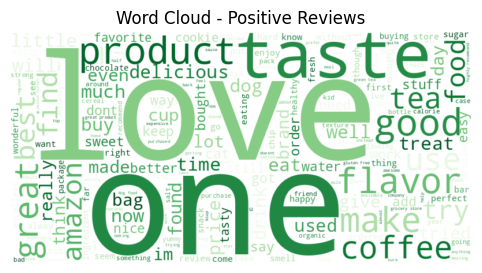

In [21]:
# Generate word clouds for Positive reviews
positive_text = " ".join(df[df['label'] == 1]['clean_text'].values)

plt.figure(figsize=(8, 3))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()

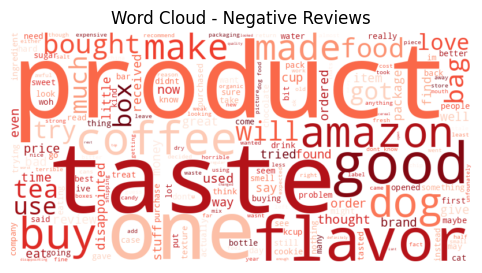

In [82]:
# Generate word clouds for Negative reviews
negative_text = " ".join(df[df['label'] == 0]['clean_text'].values)

plt.figure(figsize=(8, 3))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')
plt.show()

In [28]:
# Sentiment Distribution Count
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,82037
Negative,82037


In [42]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=7000, ngram_range=(1, 2))
X = tfidf.fit_transform(df['clean_text'])
y = df['label']

In [39]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Model Initialization
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbor": KNeighborsClassifier()
}


=== Logistic Regression ===
Accuracy: 0.8994
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     16446
           1       0.90      0.89      0.90     16369

    accuracy                           0.90     32815
   macro avg       0.90      0.90      0.90     32815
weighted avg       0.90      0.90      0.90     32815



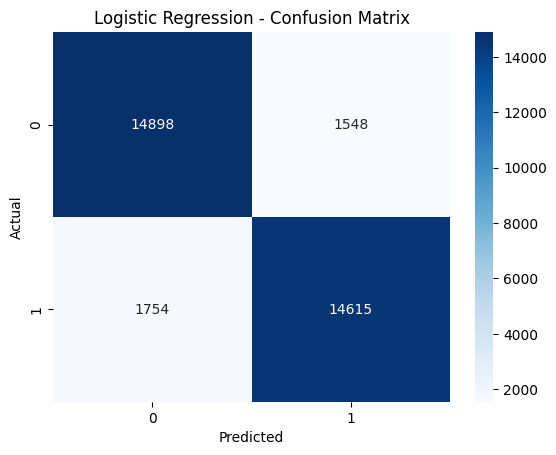


=== Naive Bayes ===
Accuracy: 0.8703
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     16446
           1       0.86      0.88      0.87     16369

    accuracy                           0.87     32815
   macro avg       0.87      0.87      0.87     32815
weighted avg       0.87      0.87      0.87     32815



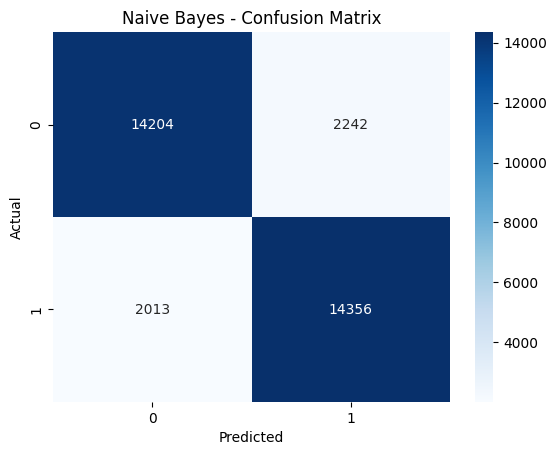


=== Support Vector Machine ===
Accuracy: 0.8989
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     16446
           1       0.90      0.89      0.90     16369

    accuracy                           0.90     32815
   macro avg       0.90      0.90      0.90     32815
weighted avg       0.90      0.90      0.90     32815



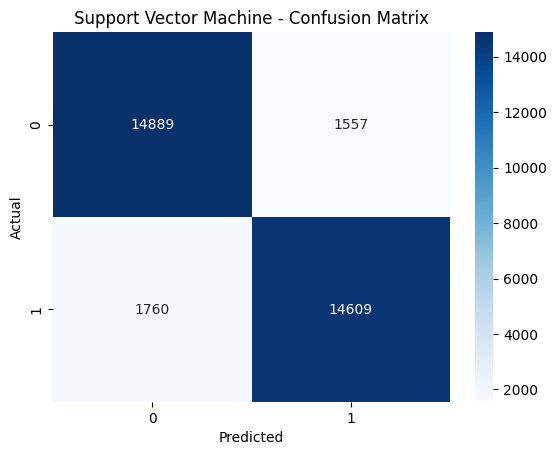


=== Random Forest ===
Accuracy: 0.9038
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     16446
           1       0.90      0.90      0.90     16369

    accuracy                           0.90     32815
   macro avg       0.90      0.90      0.90     32815
weighted avg       0.90      0.90      0.90     32815



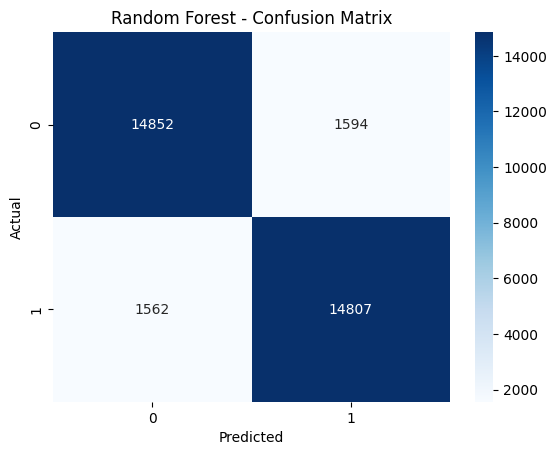


=== Decision Tree ===
Accuracy: 0.8285
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83     16446
           1       0.83      0.82      0.83     16369

    accuracy                           0.83     32815
   macro avg       0.83      0.83      0.83     32815
weighted avg       0.83      0.83      0.83     32815



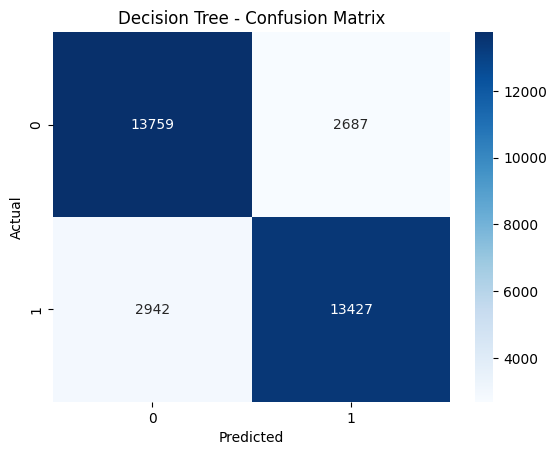


=== K-Nearest Neighbor ===
Accuracy: 0.7742
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78     16446
           1       0.78      0.77      0.77     16369

    accuracy                           0.77     32815
   macro avg       0.77      0.77      0.77     32815
weighted avg       0.77      0.77      0.77     32815



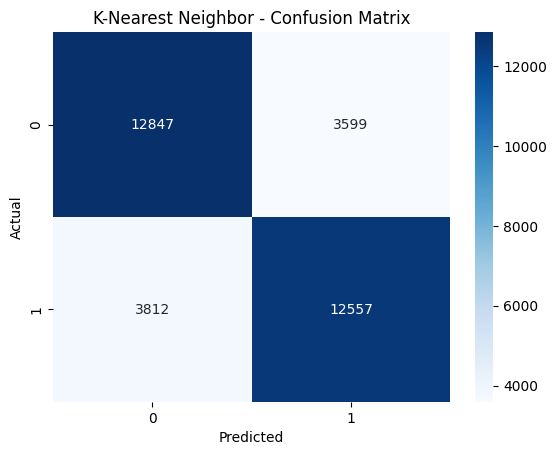

In [8]:
# Train and Evaluate Models
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

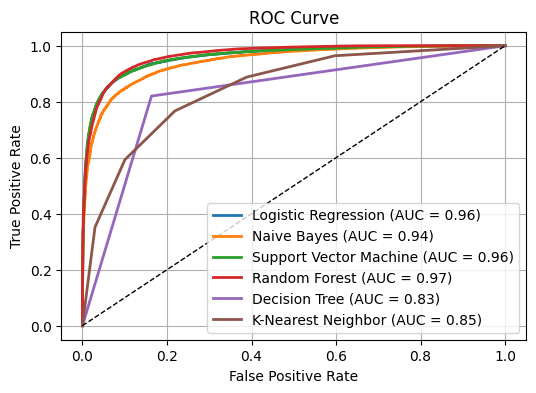

In [9]:
# ROC Curve Comparison for All Models
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()
plt.figure(figsize=(6, 4))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        probs = model.decision_function(X_test)
        probs = (probs - probs.min()) / (probs.max() - probs.min())
    else:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

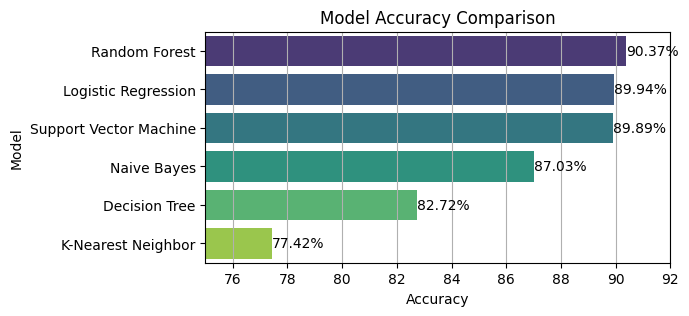

In [75]:
# Accuracy Bar Chart by Model
model_names = ['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree', 'K-Nearest Neighbor']
accuracies = [0.9037, 0.8994, 0.8989, 0.8703, 0.8272, 0.7742]
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': [round(acc * 100, 2) for acc in accuracies]})

plt.figure(figsize=(6, 3))
barplot = sns.barplot(data=accuracy_df, x='Accuracy', y='Model', hue='Model', palette='viridis')
for container in barplot.containers:
    barplot.bar_label(container, labels=[f'{v.get_width():.2f}%' for v in container], label_type='edge')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(75, 92)
plt.grid(axis='x')
plt.show()